In [16]:
import numpy as np
import pandas as pd


In [17]:
df = pd.read_csv('spam.csv')

In [18]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3994,ham,R u in this continent?,NaN,NaN,NaN
1031,ham,Yup bathe liao...,NaN,NaN,NaN
505,ham,No it's waiting in e car dat's bored wat. Cos ...,NaN,NaN,NaN
5053,spam,Double Mins & Double Txt & 1/2 price Linerenta...,NaN,NaN,NaN
4391,ham,what are your new years plans?,NaN,NaN,NaN


df.shape

In [ ]:
# 1. Data cleaning
# 2. Exploratory data analysis
# 3. Text preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy


#1 Data cleaning

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [20]:
# Dropping last 3 columns coz less amount of data
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [21]:
df.sample(5)

,v1,v2
141,ham,"Sir, Waiting for your mail."
792,ham,Y?WHERE U AT DOGBREATH? ITS JUST SOUNDING LIKE...
970,ham,"Yar lor he wan 2 go c horse racing today mah, ..."
5368,spam,IMPORTANT MESSAGE. This is a final contact att...
5184,ham,I'm in town now so i'll jus take mrt down later.


In [22]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace = True)

In [23]:
df.sample(5)

,target,text
1015,ham,"Dear,regret i cudnt pick call.drove down frm c..."
3800,ham,"It's ok, at least armand's still around"
3127,ham,would u fuckin believe it they didnt know i ha...
2458,ham,"Cool, I'll text you when I'm on the way"
3463,ham,My phone


In [24]:
!pip install scikit-learn

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [26]:
df['target'] = encoder.fit_transform(df['target'])
# 0 - not spam
# 1 - spam

In [27]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [29]:
#check for duplicate values
df.duplicated().sum()

403

In [30]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [31]:
df.duplicated().sum()

0

In [32]:
df.shape

(5169, 2)

EDA

In [33]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [34]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

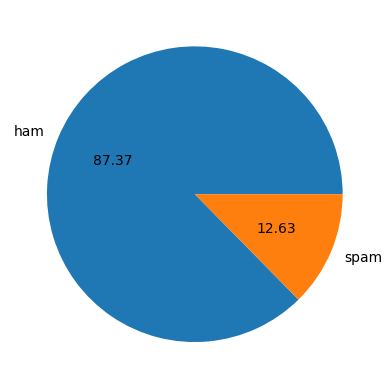

In [35]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct = "%0.2f")
plt.show()

In [35]:
import nltk

In [36]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HOME\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
df['num_characters'] = df['text'].apply(len)

In [38]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [39]:
# number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [40]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [41]:
df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [42]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [43]:
df[['num_characters','num_sentence','num_words']].describe()

,num_characters,num_sentence,num_words
count,5169.000000,5169.000000,5169.000000
mean,78.923776,1.966531,18.456761
std,58.174846,1.449833,13.325633
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,9.000000
50%,60.000000,1.000000,15.000000
75%,117.000000,2.000000,26.000000
max,910.000000,38.000000,220.000000


In [44]:
df[df['target'] == 0][['num_characters','num_sentence','num_words']].describe()

,num_characters,num_sentence,num_words
count,4516.000000,4516.000000,4516.000000
mean,70.456820,1.820195,17.123782
std,56.356802,1.383657,13.493970
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,8.000000
50%,52.000000,1.000000,13.000000
75%,90.000000,2.000000,22.000000
max,910.000000,38.000000,220.000000


In [45]:
df[df['target'] == 1][['num_characters','num_sentence','num_words']].describe()

,num_characters,num_sentence,num_words
count,653.000000,653.000000,653.000000
mean,137.479326,2.978560,27.675345
std,30.014336,1.493185,7.011513
min,13.000000,1.000000,2.000000
25%,131.000000,2.000000,25.000000
50%,148.000000,3.000000,29.000000
75%,157.000000,4.000000,32.000000
max,223.000000,9.000000,46.000000


In [46]:
!pip install seaborn

In [47]:
import seaborn as sns

In [48]:
plt.figure(figsize=(16,12))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color = 'red')

NameError: name 'plt' is not defined

<AxesSubplot: xlabel='num_words', ylabel='Count'>

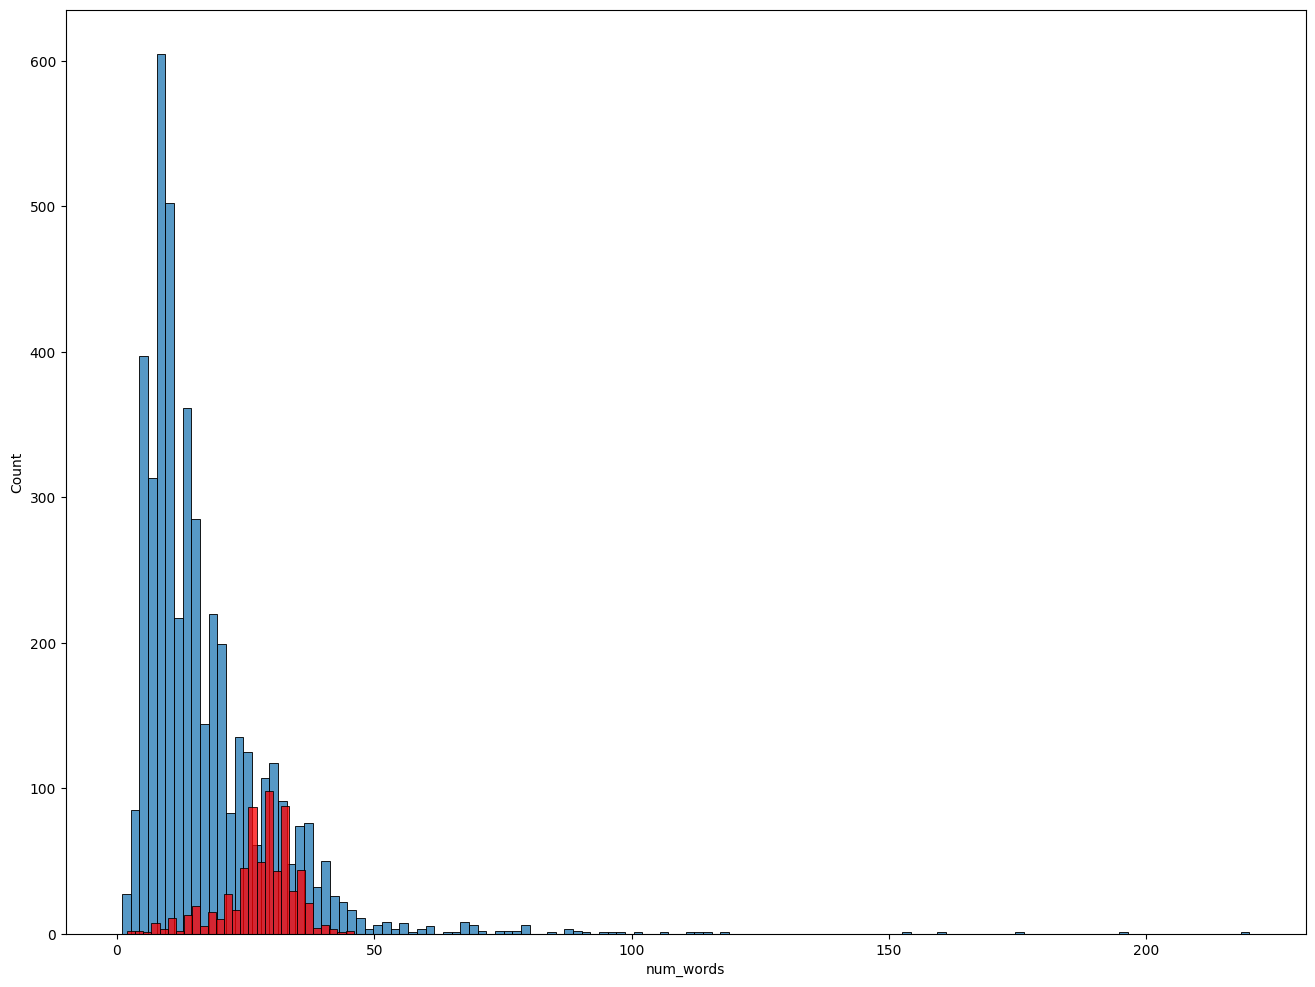

In [67]:
plt.figure(figsize=(16,12))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color = 'red')

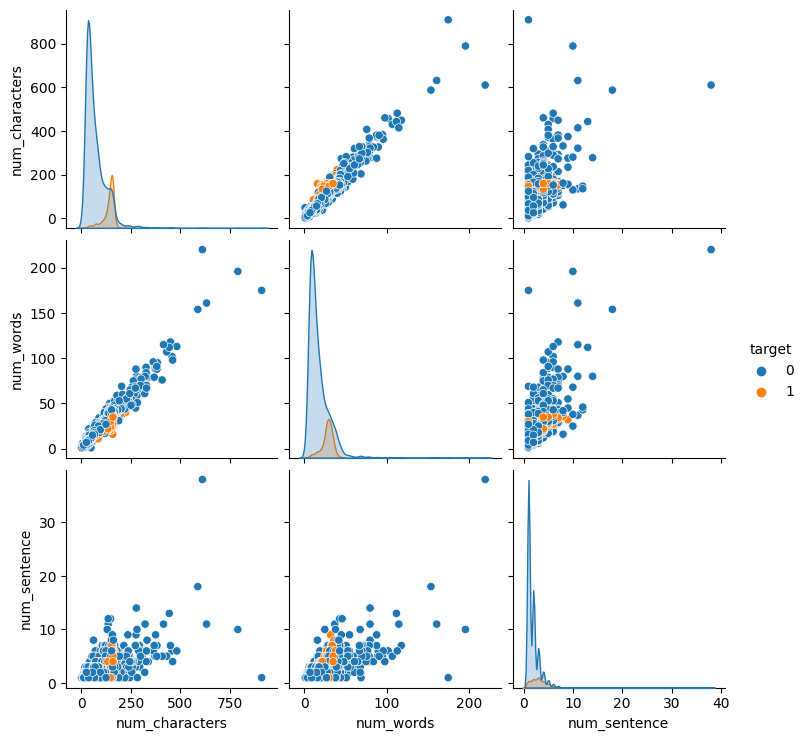

In [49]:
sns.pairplot(df,hue='target')

<AxesSubplot: >

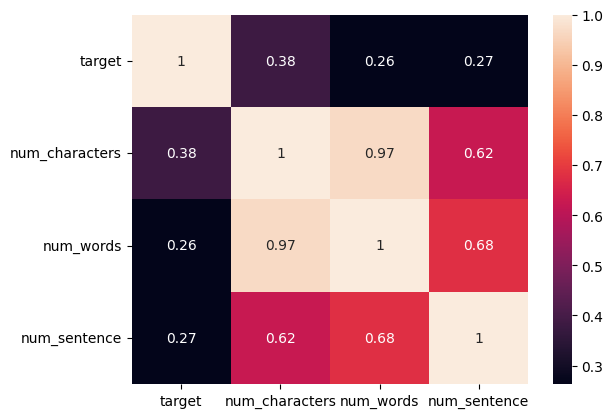

In [50]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing
lower case
tokenization
removing special characters
removing stop words and punctuations
stemming



In [51]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HOME\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
from nltk.corpus import stopwords
import string

In [61]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [62]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)


In [63]:
transform_text('I loved the YT lectures on Machine Learning. How about YOu?')

'love yt lectur machin learn'

In [64]:
 df['transformed_text'] = df['text'].apply(transform_text)

In [65]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [66]:
from wordcloud import WordCloud
wc = WordCloud(width=50,height=50,min_font_size=10,background_color='white')

In [67]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

AttributeError: 'TransposedFont' object has no attribute 'getbbox'

In [68]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [69]:
len(spam_corpus)

9941

In [70]:
ham_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [71]:
len(spam_corpus)

19882

In [103]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [104]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [105]:
X.shape

(5169, 3000)

In [106]:
y = df['target'].values

In [107]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [108]:
from sklearn.model_selection import train_test_split


In [109]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [110]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [111]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [112]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8704061895551257
[[788 108]
 [ 26 112]]
0.509090909090909


In [113]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [114]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier




In [116]:
lg = LogisticRegression(solver='liblinear',penalty='l1')
svc = SVC(kernel='sigmoid',gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators = 50, random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
ab = AdaBoostClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(N_estimators=50,random_state=2)

In [117]:
clfs = {
    'SVC': svc,
    'KN' : knc,
    'NB' : mnb,
    'LR' : lg,
    'Rf' : rfc,
    'AdaBoost' : ab,
    'BgC': bc,
    'GBDT': gbc,
    'XGB' : xgb
}

In [118]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [119]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision -",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision - 0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision - 1.0
For  NB
Accuracy -  0.971953578336557
Precision - 1.0
For  LR
Accuracy -  0.9564796905222437
Precision - 0.9696969696969697
For  Rf
Accuracy -  0.9748549323017408
Precision - 0.9827586206896551
For  AdaBoost
Accuracy -  0.9613152804642167
Precision - 0.9454545454545454
For  BgC
Accuracy -  0.9593810444874274
Precision - 0.8692307692307693
For  GBDT
Accuracy -  0.9468085106382979
Precision - 0.9278350515463918
[12:58:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "N_estimators" } are not used.

For  XGB
Accuracy -  0.971953578336557
Precision - 0.943089430894309


In [120]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [121]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.971954,1.000000
4,Rf,0.974855,0.982759
0,SVC,0.975822,0.974790
3,LR,0.956480,0.969697
5,AdaBoost,0.961315,0.945455
8,XGB,0.971954,0.943089
7,GBDT,0.946809,0.927835
6,BgC,0.959381,0.869231


In [102]:
#model improme
# change the max_features parameter of TfIdf

In [122]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [124]:
temp_df = performance_df.merge(temp_df,on='Algorithm')

In [125]:
temp_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.971954,1.000000,0.971954,1.000000
2,Rf,0.974855,0.982759,0.974855,0.982759
3,SVC,0.975822,0.974790,0.975822,0.974790
4,LR,0.956480,0.969697,0.956480,0.969697
5,AdaBoost,0.961315,0.945455,0.961315,0.945455
6,XGB,0.971954,0.943089,0.971954,0.943089
7,GBDT,0.946809,0.927835,0.946809,0.927835
8,BgC,0.959381,0.869231,0.959381,0.869231


In [126]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))